### Based on the following information:
    
    
     

• The reconstruction of δyz and the evaluation of ∂(θC ,φC ) ∂(xdet,ydet)  

needs to be done only once per photon hit on the detector plane. Each take 25 µs in our implementation.  

• The remainder of the photon-reconstruction needs to be evaluated once per photon,  

per track and per particle hypothesis. This takes us 1 µs per trace and 25 µs per photon-track combination.  

• The PDF numerator needs to be evaluated once per photon per track per particle hypothesis and takes 8 µs each time.  

 • The PDF integration needs to be done once per track per particle hypothesis. This is the main drain of time in our implementation, with 6 ms.  

 

 

SOURCE: Rademacker, Jonas. TORCH Reconstruction. No. LHCb-PUB-2022-004. 2022. 

 

 

In [11]:
def quantify_torch_reconstruction_time(num_of_hits_from_detector, num_tracks, num_hypotheses):
    results = {}

    # Step 1 - reconstruction of δyz and the evaluation of ∂(θC ,φC ) ∂(xdet,ydet)
    num_recon_step_1 = num_of_hits_from_detector
    step_1_total_time = num_recon_step_1 * 25
    results['step_1_num'] = num_recon_step_1
    results['step_1_time'] = step_1_total_time

    # Step 2 - Integrations
    num_recon_step_2 = num_of_hits_from_detector * num_tracks * num_hypotheses
    step_2_total_time = num_recon_step_2 * 1
    results['step_2_num'] = num_recon_step_2
    results['step_2_time'] = step_2_total_time

    # Step 3 - PDF numerator evaluation
    num_PDF_numerators = num_of_hits_from_detector * num_tracks * num_hypotheses
    step_3_total_time = num_PDF_numerators * 8
    results['step_3_num'] = num_PDF_numerators
    results['step_3_time'] = step_3_total_time

    # Step 4 - Integrations
    num_integrations = num_tracks * num_hypotheses
    step_4_total_time = num_integrations * 6000
    results['step_4_num'] = num_integrations
    results['step_4_time'] = step_4_total_time

    total_time = step_1_total_time + step_2_total_time + step_3_total_time + step_4_total_time
    results['total_time'] = total_time

    return results


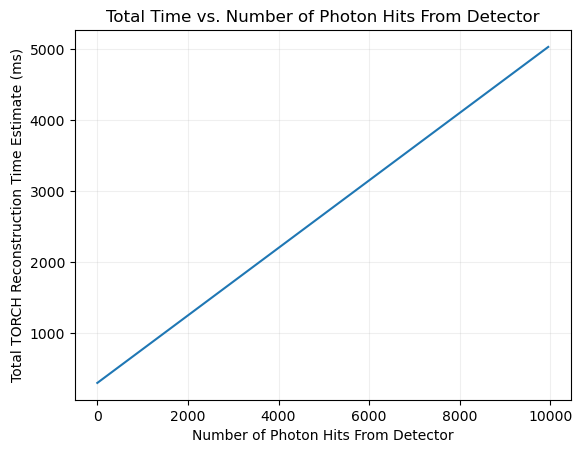

In [15]:
import matplotlib.pyplot as plt

num_of_hits_from_detector = 5
num_tracks = 10       #are these a function of the num_of_hits_from_detector??
num_hypotheses = 3    #are these a function of the num_of_hits_from_detector??


# Set up lists to store values for x and y axis of plot
x_values = []
y_values = []

# Loop over range of values for num_of_hits_from_detector
for num in range(1, 10001, 50):
    # Call the function and get the total_time value
    results = quantify_torch_reconstruction_time(num, 10, 5)
    total_time = results['total_time']/1000   #converitng to ms from µs

    # Add values to lists for plot
    x_values.append(num)
    y_values.append(total_time)

# Create the plot
plt.plot(x_values, y_values)
plt.xlabel('Number of Photon Hits From Detector')
plt.ylabel('Total TORCH Reconstruction Time Estimate (ms)')
plt.title('Total Time vs. Number of Photon Hits From Detector')
plt.grid(alpha=0.2)
plt.show()




In [ ]:
#Should i normalise the time to between 0-1 so its reletive time and not specific to jonas macbook timings?